# Examine AudioMoth WAV File

Look at frequency spectrum and wave form of a WAV fike


## Choose the file

In [4]:
# Shared code
from utilities import *

# ** Set path to files folder here **
path = '/Users/bill/Documents/AudioMoth/test/'

# Browse for path to file
file_dialog = browse_for_path(path, False)
print("Path is: ", path)

FileChooser(path='/Users/bill/Documents/AudioMoth/test', filename='', title='<b>Browse to Recordings to Proces…

Path is:  /Users/bill/Documents/AudioMoth/test/


## Frequency ranges of interest

In [5]:
freqRanges = {
    # Bats 40Khz to 60Khz
    'bats': [40000,60000],

    # Birds 1Khz to 12Khz
    'birds':[1000,12000],
}
print('Frequency ranges: ', freqRanges)

Frequency ranges:  {'bats': [40000, 60000], 'birds': [1000, 12000]}


Run this to examine the file

Examine file:  /Users/bill/Documents/AudioMoth/test/birds/20230202_075900T.WAV
/Users/bill/Documents/AudioMoth/test/birds/20230202_075900T.WAV exists and is a WAV file.
File looks OK for WAV
--------------------------------------------------------------------------------------------------
File:  /Users/bill/Documents/AudioMoth/test/birds/20230202_075900T.WAV
Spectrogram file:  /Users/bill/Documents/AudioMoth/test/birds/20230202_075900T.WAV_spec.jpg
Freq chart file:  /Users/bill/Documents/AudioMoth/test/birds/20230202_075900T.WAV_freq.jpg
Details:  Recorded at 07:59:00 02/02/2023 (UTC) by AudioMoth 247AA506603EC3A8 at medium-high gain while battery was 3.9V and temperature was 10.9C. High-pass filter with frequency of 50.5kHz applied. Amplitude threshold was 192 with 2s minimum trigger duration.
Recorded time:  07:59:00 02/02/2023 (UTC)
Battery voltage:  3.9
Temperature:  10.9
Sample rate: 250000


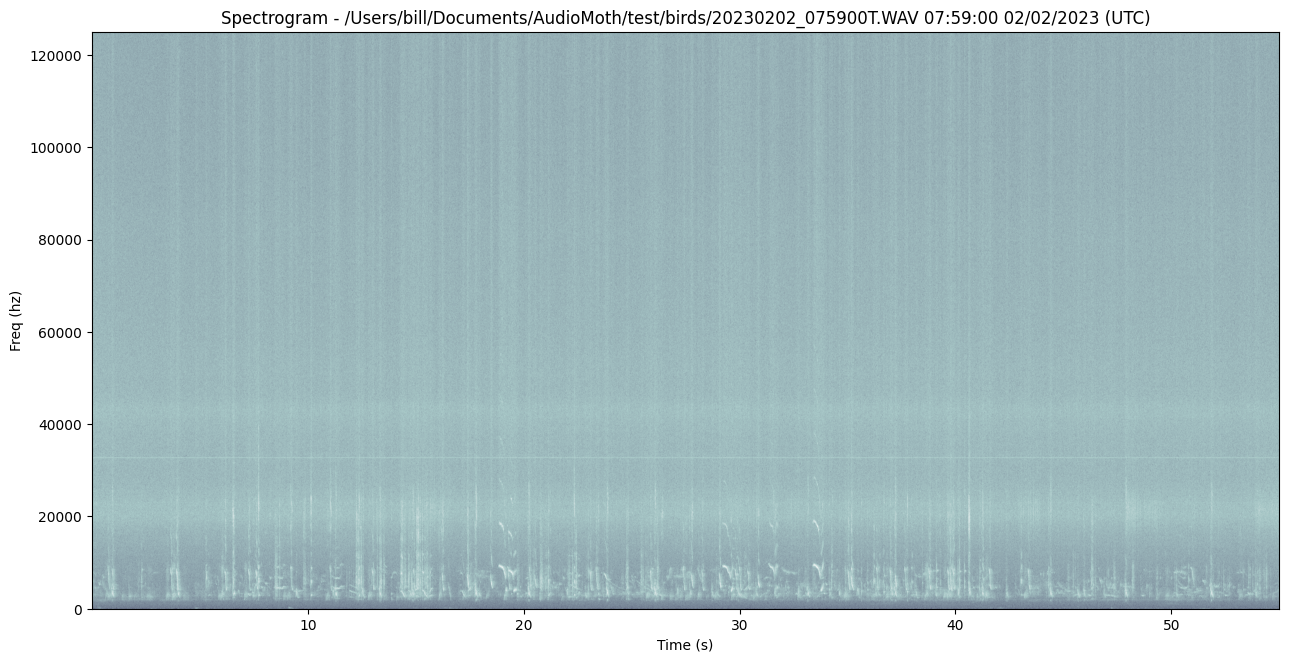

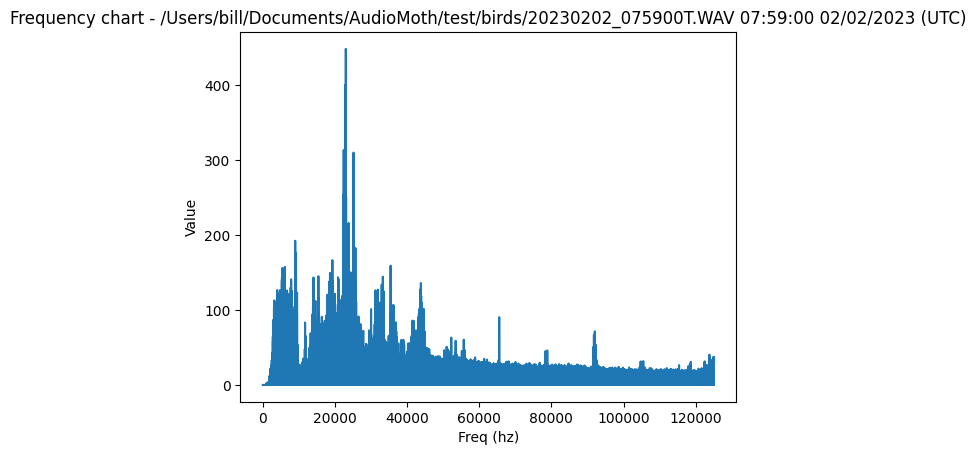

*** Frequency analysis for range:  bats
Start frequency :  40000
End frequency :  60000
Max freq Khz: 23.01
Max freq value: 448.3
Freq of interest range (Khz): 40.0,60.0
Max value in range of interest: 135.93
Max frequency in range of interest (Khz): 43.83
-------------
*** Frequency analysis for range:  birds
Start frequency :  1000
End frequency :  12000
Max freq Khz: 23.01
Max freq value: 448.3
Freq of interest range (Khz): 1.0,12.0
Max value in range of interest: 192.34
Max frequency in range of interest (Khz): 8.99
-------------


In [6]:
# Update path from dialog
path = file_dialog.selected
print('Examine file: ', path)

if(check_wav_file(path) == True):
    print('File looks OK for WAV')
    
    # Spectrogram and frequency chart file paths
    spectrogram_path = path + '_spec.jpg'
    freq_chart_path = path + '_freq.jpg'
    
    # Get comment and recorded time, voltage, temp
    comment, recorded_time, battery, temperature = get_comment_and_data(path)

    # Print some useful info about the files...
    print('--------------------------------------------------------------------------------------------------')
    print('File: ', path)
    print('Spectrogram file: ',spectrogram_path)
    print('Freq chart file: ',freq_chart_path)
    print('Details: ', comment)
    print('Recorded time: ', recorded_time)
    print('Battery voltage: ', battery)
    print('Temperature: ', temperature)

    # Get the WAV file data and sample rate
    data, rate = get_wav_info(path)
    log_and_print('Sample rate: '+str(rate))

    # Plot the spectrogram. Ignore the returned item.. 
    plot_spectrogram(data, rate, path, recorded_time, spectrogram_path) 

    # Now print out frequency range data and plot
    fileClassified = False
    doFreqPlot = True
    for freqRangeKey in freqRanges:

        freqRangeOfInterest = [freqRanges[freqRangeKey][0],freqRanges[freqRangeKey][1]]

        # Get frequencies and plot if not done
        max_freq, max_freq_val, finterest_max_val, max_freq_range = plot_get_freqs(data, rate, path, recorded_time, doFreqPlot, freqRangeOfInterest[0], freqRangeOfInterest[1], freq_chart_path)
 
        # Done freq plot so turn that off for next check..
        doFreqPlot = False

        print('*** Frequency analysis for range: ', str(freqRangeKey))
        print('Start frequency : ', str(freqRangeOfInterest[0]))
        print('End frequency : ', str(freqRangeOfInterest[1]))

        print('Max freq Khz: '+str(round(max_freq/1000,2)))
        print('Max freq value: '+str(round(max_freq_val,2)))
        print('Freq of interest range (Khz): '+str(freqRangeOfInterest[0]/1000)+','+str(freqRangeOfInterest[1]/1000))
        print('Max value in range of interest: '+str(round(finterest_max_val,2)))
        print('Max frequency in range of interest (Khz): '+str(round(max_freq_range/1000,2)))
        print('-------------')
